In [21]:
%matplotlib inline
from matplotlib.patches import Ellipse,Circle,Rectangle
import matplotlib.pyplot as plt,mpld3
from astropy.io import fits
import numpy as np
from skimage import exposure
import matplotlib.patches as mpatches

In [34]:
img=fits.open('PTF_201101245111_i_p_scie_t121602_u009806956_f02_p002845_c10.fits')


In [54]:
pwd

u'/Users/kburleigh/GradSchool/Research/peter/legacypipe/py/legacypipe'

In [37]:
a2['VIGNET'][0] - a2['VIGNET'][0,:,:]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       

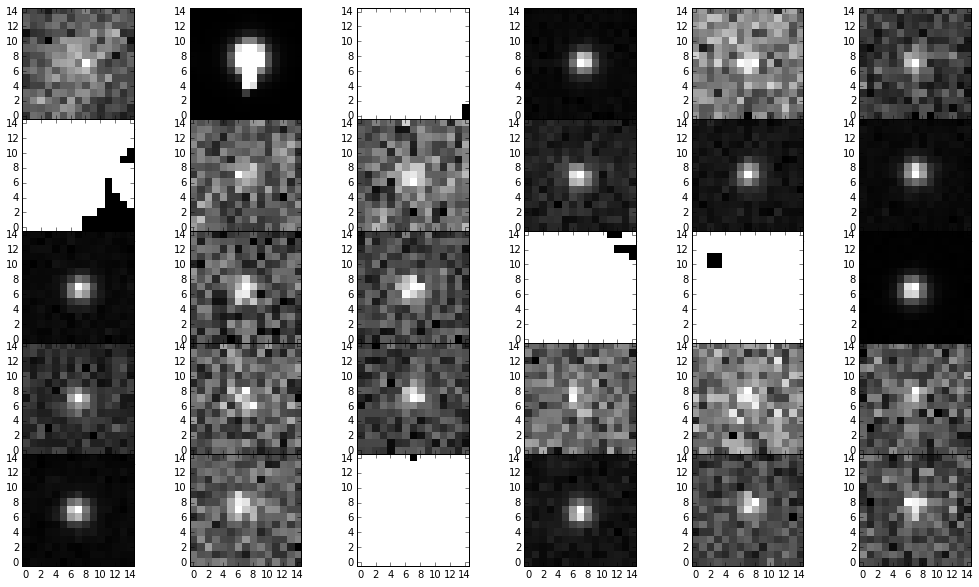

In [38]:
a=fits.open('../../../se_psfex/se_cat3.fits')
a2=a[2].data
cols= a[2].columns
ind=np.logical_and(a2['XWIN_IMAGE'] > 200,a2['XWIN_IMAGE'] < 400)

from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
plt.subplots_adjust(hspace=0, wspace=0)
# plt.figure.set_size_inches(18.5, 10.5)
rows,cols=5,6
ima = dict(interpolation='nearest', origin='lower')
for i in range(rows*cols): 
    plt.subplot(rows, cols, i+1)
    plt.imshow(a2['VIGNET'][ind,...][i,...], cmap=plt.get_cmap('gray'),**ima)


In [9]:
a=fits.open('../../../se_psfex/se_cat3.fits')
a2=a[2].data
cols= a[2].columns
cols

ColDefs(
    name = 'NUMBER'; format = '1J'; disp = 'I10'
    name = 'VIGNET'; format = '225E'; unit = 'count'; disp = 'G12.7'; dim = '(15, 15)'
    name = 'X_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F11.4'
    name = 'Y_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F11.4'
    name = 'ALPHA_J2000'; format = '1D'; unit = 'deg'; disp = 'F11.7'
    name = 'DELTA_J2000'; format = '1D'; unit = 'deg'; disp = 'F11.7'
    name = 'FLAGS'; format = '1I'; disp = 'I3'
    name = 'FLUX_RADIUS'; format = '1E'; unit = 'pixel'; disp = 'F10.3'
    name = 'FLUX_APER'; format = '8E'; unit = 'count'; disp = 'G12.7'
    name = 'FLUXERR_APER'; format = '8E'; unit = 'count'; disp = 'G12.7'
    name = 'SNR_WIN'; format = '1E'; disp = 'G10.4'
    name = 'ELONGATION'; format = '1E'; disp = 'F8.3'
    name = 'FLUX_AUTO'; format = '1E'; unit = 'count'; disp = 'G12.7'
    name = 'FLUXERR_AUTO'; format = '1E'; unit = 'count'; disp = 'G12.7'
    name = 'FWHM_WORLD'; format = '1E'; unit = 'deg'; disp = 'G12.7'

In [24]:
Rectangle?

# use ax.set_xlim to adjust image size and still see ellipse shapees

cnt=  0 xlim=  [0, 200] ylim=  [0, 200]
cnt=  1 xlim=  [0, 200] ylim=  [512, 712]


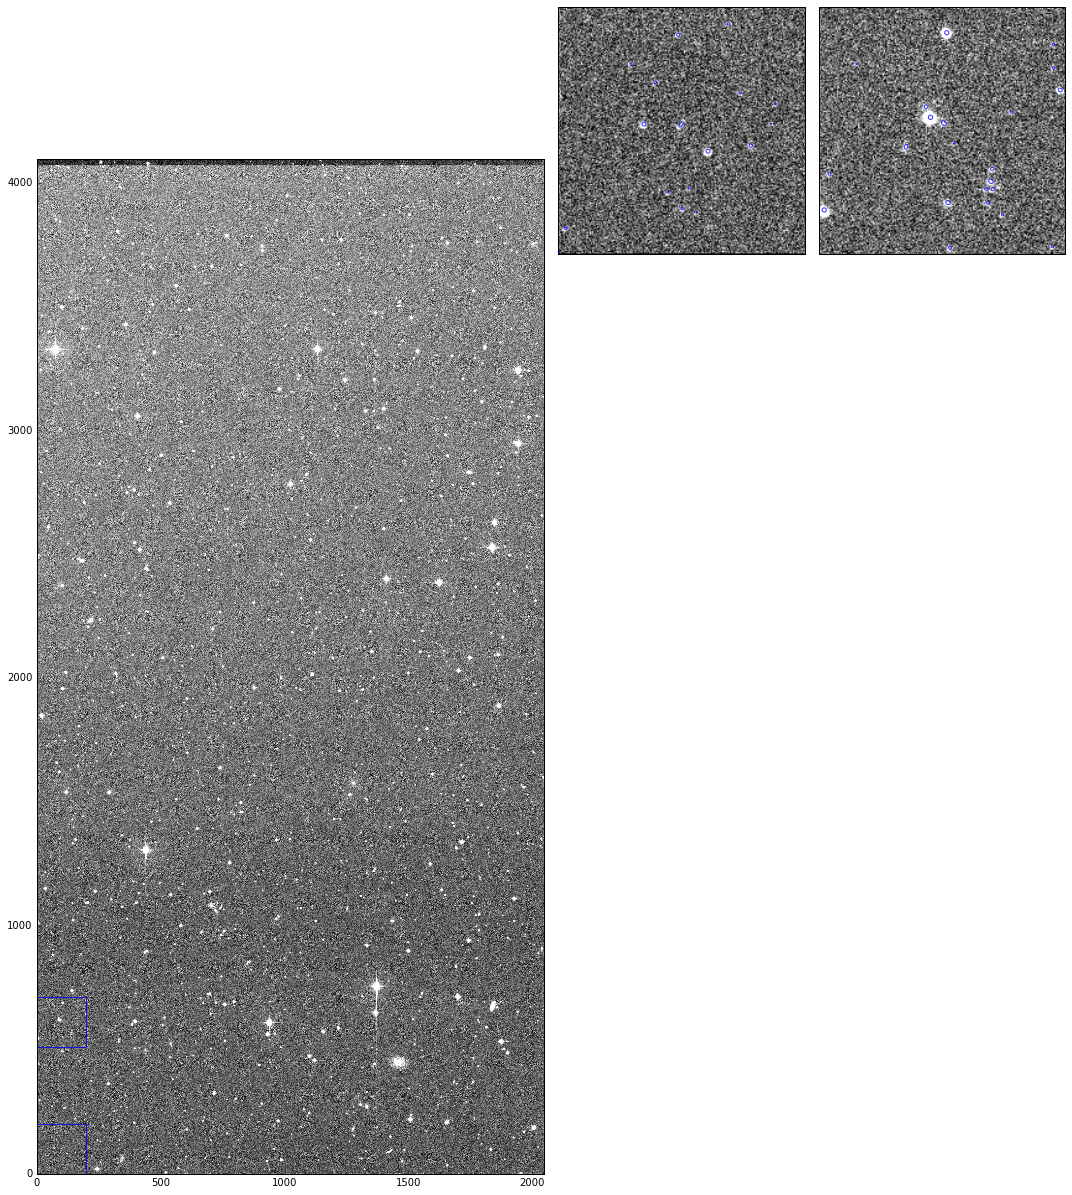

In [34]:
def plot_img(ax,imgfn):
    tmp=fits.open(imgfn)
    img=tmp[0].data
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
#     fig,ax=plt.subplots()
#     fig.set_size_inches(5.,10.)
    ax.imshow(img_rescale, cmap=plt.get_cmap('gray'),origin='lower')
    xmin,ymin= [0,0],[0,512]
    for x,y in zip(xmin,ymin):
        rect = Rectangle([x,y],200,200)
        ax.add_artist(rect)
        rect.set_alpha(0.8)
        rect.set_facecolor('none')
        rect.set_edgecolor('b')
#     ax.set_xlim(-256,1024)
#     ax.set_ylim(-256,1024)

def plot_se(imgfn,sefn):
    #image
    tmp=fits.open(imgfn)
    img=tmp[0].data
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    #se catalogue
    a=fits.open(sefn)
    a2=a[2].data
    cols= a[2].columns
    #plot
#     fig,axes=plt.subplots(4,2)
#  ax=axes.flatten()
    fig = plt.figure()
    #plot
    ax0 = plt.subplot2grid((4, 4), (0, 0), rowspan=4,colspan=2)
    plot_img(ax0,imgfn)
    #   
    #x: [0,0,0,0,512,512,512,512], y: [0,512,1024,1536,0,512,1024,1536])
    for cnt,xmin,ymin in zip(range(2),[0,0],[0,512]): 
        xlim,ylim= [xmin,xmin+200],[ymin,ymin+200]
        ax = plt.subplot2grid((4, 4), (0, 2+cnt))
        ax.set_xlim(xlim) #CRITICAL for ellipses to appear
        ax.set_ylim(ylim)
        ax.imshow(img_rescale, cmap=plt.get_cmap('gray'),origin='lower')
        ax.set_xticks([])
        ax.set_yticks([])
        print "cnt= ",cnt,"xlim= ",xlim,"ylim= ",ylim
        x_index=np.logical_and(a2['XWIN_IMAGE'] > xlim[0],a2['XWIN_IMAGE'] < xlim[1])
        y_index=np.logical_and(a2['YWIN_IMAGE'] > ylim[0],a2['YWIN_IMAGE'] < ylim[1])
        xy=np.logical_and(x_index,y_index)
        for i in range(len(a2['X_IMAGE'][xy])):
#             ellip= Ellipse(xy= (a2['XWIN_IMAGE'][xy][i],a2['YWIN_IMAGE'][xy][i]),\
#                                        width=2*a2['AWIN_IMAGE'][xy][i], \
#                                        height=2*a2['BWIN_IMAGE'][xy][i],\
#                                        angle=a2['THETAWIN_IMAGE'][xy][i])
            ellip= Ellipse(xy= (a2['X_IMAGE'][xy][i],a2['Y_IMAGE'][xy][i]),\
                                       width=2*a2['A_IMAGE'][xy][i], \
                                       height=2*a2['B_IMAGE'][xy][i],\
                                       angle=a2['THETA_IMAGE'][xy][i])
            ax.add_artist(ellip)
            ellip.set_alpha(0.8)
            ellip.set_facecolor('none')
            ellip.set_edgecolor('b')
    fig.set_size_inches(15.,20.)
    plt.subplots_adjust(hspace=0, wspace=0)
    plt.tight_layout()
    plt.savefig('SExtractor_objects.png',dpi=150)

imgfn='../../../se_psfex/PTF_201101245111_i_p_scie_t121602_u009806956_f02_p002845_c10.fits'
sefn='../../../se_psfex/se_cat4.fits'
# plot_img(imgfn)
plot_se(imgfn,sefn)

[]

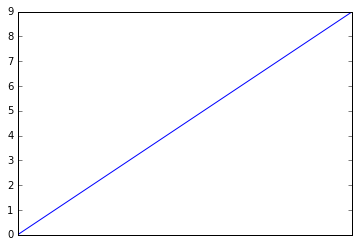


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html.

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [07/Dec/2015 16:31:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2015 16:31:45] "GET /d3.js HTTP/1.1" 200 -



stopping Server...


127.0.0.1 - - [07/Dec/2015 16:31:46] "GET /mpld3.js HTTP/1.1" 200 -


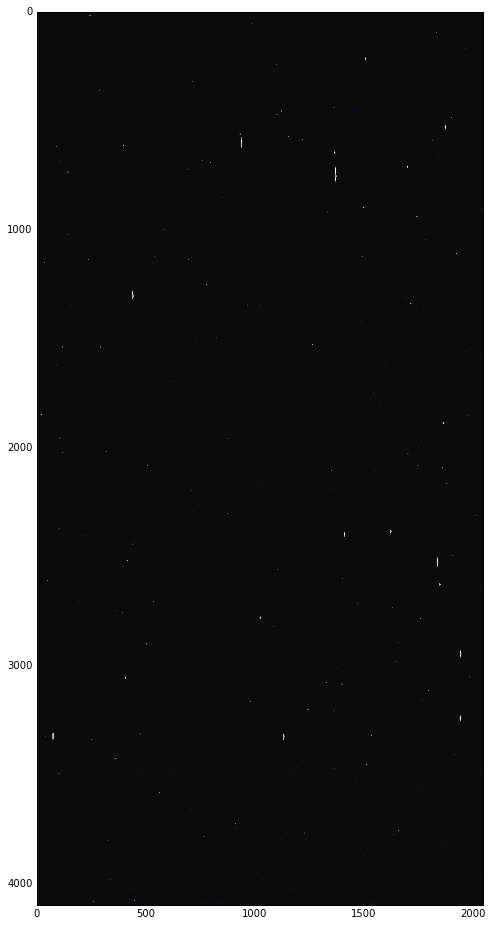

In [17]:
def plot_full_se(imgfn,se_cat_fn,):
    #se catalogue
    a=fits.open(se_cat_fn)
    a2=a[2].data
    cols= a[2].columns
    #vignettes
    tmp=fits.open(imgfn)
    img=tmp[0].data
    #plot
    fig,ax=plt.subplots()
    plt.subplots_adjust(hspace=0, wspace=0)
    fig.set_size_inches(8.,16.)
    ima = {} #dict(interpolation='nearest', origin='lower')
    ax.imshow(, cmap=plt.get_cmap('gray'),**ima)
    for i in range(len(a2['AWIN_IMAGE'])): 
#         p2, p98 = np.percentile(a2['VIGNET'][xy][i], (2, 98))
#         img_rescale = exposure.rescale_intensity(a2['VIGNET'][xy][i], in_range=(p2, p98))
#         ax[i].imshow(img_rescale, cmap=plt.get_cmap('gray'),**ima)
        ellip= Ellipse(xy= (a2['X_IMAGE'][i],a2['Y_IMAGE'][i]),\
                               width=2*a2['AWIN_IMAGE'][i], \
                               height=2*a2['BWIN_IMAGE'][i],\
                               angle=a2['THETAWIN_IMAGE'][i])
        ax.add_artist(ellip)
        ellip.set_alpha(0.25)
        ellip.set_facecolor('b')
    mpld3.show()
        
imgfn='../../../se_psfex/PTF_201101245111_i_p_scie_t121602_u009806956_f02_p002845_c10.fits'
sefn='../../../se_psfex/se_cat3.fits'
plot_full_se(imgfn,sefn)


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html.

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [07/Dec/2015 16:26:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2015 16:26:44] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2015 16:26:44] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2015 16:26:45] code 404, message Not Found



stopping Server...


127.0.0.1 - - [07/Dec/2015 16:26:45] "GET /favicon.ico HTTP/1.1" 404 -


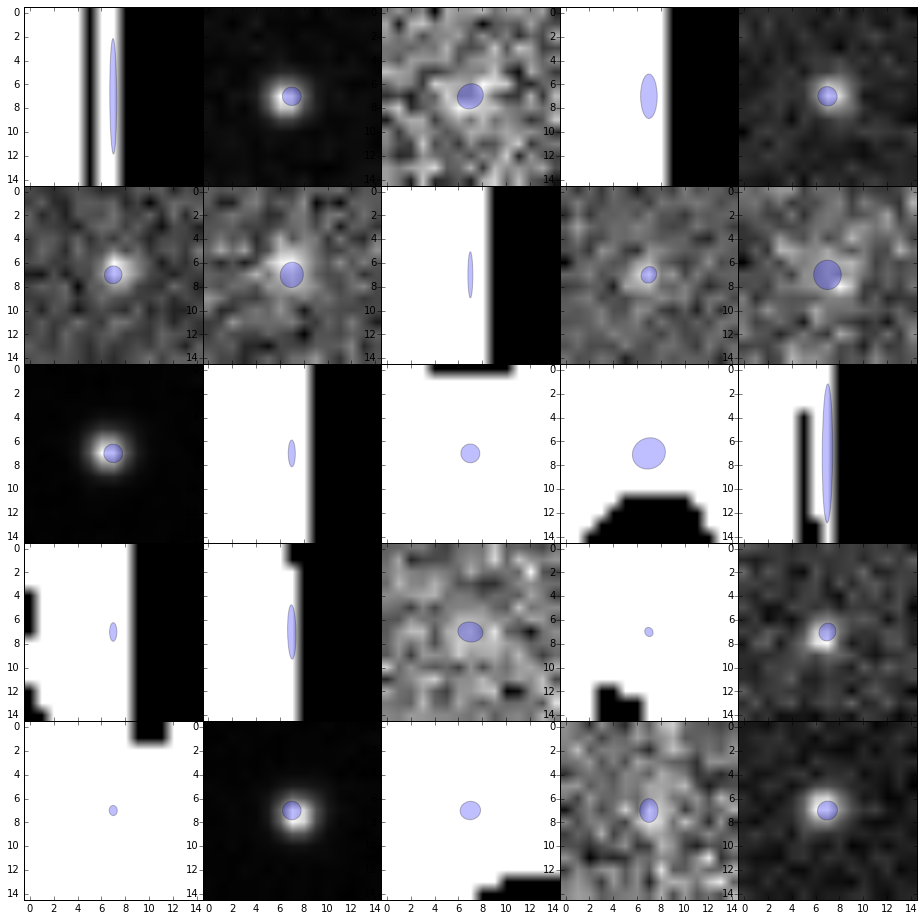

In [16]:
# def plot_image(ax,imgfn):
#     a=fits.open(imgfn)
#     img=a[0].data.shape
#     for i in len(ax): plt.imshow(img,cmap=plt.get_cmap('gray'))

def plot_se(imgfn,se_cat_fn,wh=500):
    #se catalogue
    a=fits.open(se_cat_fn)
    a2=a[2].data
    cols= a[2].columns
    #vignettes
    tmp=fits.open(imgfn)
    img=tmp[0].data
    cx,cy= img.shape[0]/2.,img.shape[1]/2.
    x_index=np.logical_and(a2['XWIN_IMAGE'] > cx-wh/2.,a2['XWIN_IMAGE'] < cx+wh/2.)
    y_index=np.logical_and(a2['YWIN_IMAGE'] > cy-wh/2.,a2['YWIN_IMAGE'] < cy+wh/2.)
    xy=np.logical_and(x_index,y_index)
    #plot
    rows,cols=5,5
    fig,axes=plt.subplots(rows,cols)
    plt.subplots_adjust(hspace=0, wspace=0)
    fig.set_size_inches(16.,16.)
    ax=axes.flatten()
#     from pylab import rcParams
#     rcParams['figure.figsize'] = 16, 16
#     rows,cols=6,6
    ima = {} #dict(interpolation='nearest', origin='lower')
    num= np.min([a2['XWIN_IMAGE'][xy].shape[0],rows*cols])
    for i in range(num): 
#         p2, p98 = np.percentile(a2['VIGNET'][xy][i], (2, 98))
#         img_rescale = exposure.rescale_intensity(a2['VIGNET'][xy][i], in_range=(p2, p98))
#         ax[i].imshow(img_rescale, cmap=plt.get_cmap('gray'),**ima)
        ax[i].imshow(a2['VIGNET'][xy][i], cmap=plt.get_cmap('gray'),**ima)
        ellip= Ellipse(xy= (7,7),\
                               width=2*a2['AWIN_IMAGE'][xy][i], \
                               height=2*a2['BWIN_IMAGE'][xy][i],\
                               angle=a2['THETAWIN_IMAGE'][xy][i])
        ax[i].add_artist(ellip)
        ellip.set_alpha(0.25)
        ellip.set_facecolor('b')
#     #object shapes
#     ells=[]
#     cnt=0
#     for x,y,a,b,theta in zip(a2['XWIN_IMAGE'][xy],a2['YWIN_IMAGE'][xy],\
#                 a2['AWIN_IMAGE'][xy],a2['BWIN_IMAGE'][xy],a2['THETAWIN_IMAGE'][xy]):
#         cnt+=1
#         if cnt <= 10: print "x,y,a,b,theta= ",x,y,a,b,theta
#         ells.append(Ellipse(xy=[x,y], width=2*a, height=2*b, angle=theta))
# #     ells = [Ellipse(xy=[x,y], width=2*a, height=2*b, angle=theta)
# #         for x,y,a,b,theta in zip(a2['XWIN_IMAGE'],a2['YWIN_IMAGE'],\
# #                 a2['AWIN_IMAGE'],a2['BWIN_IMAGE'],a2['THETAWIN_IMAGE'])]
#     fig,ax = plt.subplots()
#     for e in ells:
#         ax.add_artist(e)
#         e.set_clip_box(ax.bbox)
        
#     print 'cx,cy= ',cx,cy,'wh= ',wh
#     ax.set_xlim(cx-wh/2.,cx+wh/2.)
#     ax.set_ylim(cy-wh/2.,cy+wh/2.)
#     plt.show()
    mpld3.show()
        
imgfn='../../../se_psfex/PTF_201101245111_i_p_scie_t121602_u009806956_f02_p002845_c10.fits'
sefn='../../../se_psfex/se_cat3.fits'
plot_se(imgfn,sefn)


In [72]:
a=fits.open('psfex_cat.fits')
a.info()
dat=a[1].data
hd=a[1].header


Filename: psfex_cat.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1    PSF_DATA    BinTableHDU     32   1R x 1C      [1350E]   


In [95]:
a[1].header
pf = fits.open('psfex_cat.fits', memmap=True)
data = pf[1].data
hdr = pf[1].header
# data['psf_mask'
hdr

IndexError: index 1 is out of bounds for axis 0 with size 1

In [107]:
data['PSF_MASK'][0]
hdr['POLDEG1'] #.strip() #== 'X_IMAGE'

2

In [94]:
print dat.columns
ims=dat['PSF_MASK']
print hdr.get('POLZERO1'),hdr.get('POLZERO2')

ColDefs(
    name = 'PSF_MASK'; format = '1350E'; dim = '(15, 15, 6)'
)
1024.89043617 2043.35246277


In [100]:
data[0].shape

AttributeError: 'FITS_record' object has no attribute 'shape'

In [123]:
a=fits.open('psfex_cat.fits', memmap=True)
pf[1].header

XTENSION= 'BINTABLE'           / THIS IS A BINARY TABLE (FROM THE LDACTOOLS)    
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                 5400 / BYTES PER ROW                                  
NAXIS2  =                    1 / NUMBER OF ROWS                                 
PCOUNT  =                    0 / RANDOM PARAMETER COUNT                         
GCOUNT  =                    1 / GROUP COUNT                                    
TFIELDS =                    1 / FIELDS PER ROWS                                
EXTNAME = 'PSF_DATA'           / TABLE NAME                                     
LOADED  =                  715 / Number of loaded sources                       
ACCEPTED=                  681 / Number of accepted sources                     
CHI2    =           1.07953318 / Final Chi2                                     
POLNAXIS=                   

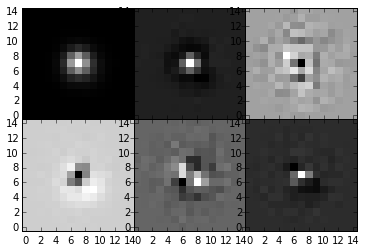

In [5]:
def psf_basis(psfexfn):
    pf = fits.open(psfexfn, memmap=True)
    data = pf[1].data['PSF_MASK']
    data=data[0]
    hdr = pf[1].header
    plt.subplots_adjust(hspace=0, wspace=0)
    rows,cols=2,3
    ima = dict(interpolation='nearest', origin='lower')
    for i in range(data.shape[0]): 
        plt.subplot(rows, cols, i+1)
        plt.imshow(data[i,:,:], cmap=plt.get_cmap('gray'),**ima)
psf_basis('../../../se_psfex/psfex_cat.fits')

In [ ]:
def psf_grid(psfexfn):
    pf = fits.open(psfexfn, memmap=True)
    data = pf[1].data['PSF_MASK']
    data=data[0]
    hdr = pf[1].header
    plt.subplots_adjust(hspace=0, wspace=0)
    rows,cols=2,3
    ima = dict(interpolation='nearest', origin='lower')
    for i in range(data.shape[0]): 
        plt.subplot(rows, cols, i+1)
        plt.imshow(data[i,:,:], cmap=plt.get_cmap('gray'),**ima)
psf_grid('psfex_cat.fits')

def plot_grid(psf, xx, yy, term=None, stampsize=None, **kwargs):

    nil,xpows,ypows = psf.polynomials(0., 0., powers=True)
    plt.clf()
    i = 1
    for y in yy:
        for x in xx:
            psf = None
            for ip,(xp,yp) in enumerate(zip(xpows, ypows)):
                if term is not None and term != ip:
                    continue
                poly = psf.polynomials(x, y)
                thispsf = poly[ip] * psf.psfbases[ip,:,:]
                if psf is None:
                    psf = thispsf
                else:
                    psf += thispsf
            plt.subplot(len(yy), len(xx), i)
            i = i + 1
            if cut > 0:
                psf = psf[cut:-cut, cut:-cut]
            plt.imshow(psf, **ima)
            plt.xticks([]); plt.yticks([])
    if term is not None:
        plt.suptitle('PSF component for x^%i y^%i' % (xpows[term], ypows[term]))

('Got', (6, 15, 15), 'PSF images')
('PsfEx sampling:', 1.0)
('PsfEx degree:', 2)


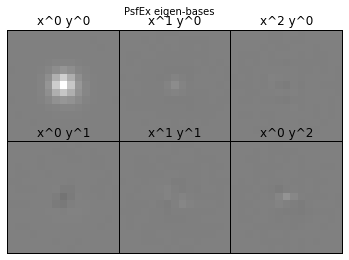

In [6]:
class KaylanPsfex(object):
    '''
    An object representing a PsfEx PSF model.
    '''
    def __init__(self, psfexfn):
        pf = fits.open(psfexfn, memmap=True)
        ims = pf[1].data['PSF_MASK']
        ims=ims[0]
        hdr = pf[1].header
        print('Got', ims.shape, 'PSF images')
        # PSF distortion bases are polynomials of x,y
        assert(hdr['POLNAME1'].strip() == 'X_IMAGE')
        assert(hdr['POLNAME2'].strip() == 'Y_IMAGE')
        assert(hdr['POLGRP1'] == 1)
        assert(hdr['POLGRP2'] == 1)
        assert(hdr['POLNGRP' ] == 1)
        x0     = hdr.get('POLZERO1')
        xscale = hdr.get('POLSCAL1')
        y0     = hdr.get('POLZERO2')
        yscale = hdr.get('POLSCAL2')
        degree = hdr.get('POLDEG1')
        self.sampling = hdr.get('PSF_SAMP')
        print('PsfEx sampling:', self.sampling)
        # number of terms in polynomial
        ne = (degree + 1) * (degree + 2) / 2
        assert(hdr['PSFAXIS3'] == ne)
        assert(len(ims.shape) == 3)
        assert(ims.shape[0] == ne)
        self.psfbases = ims
        self.xscale, self.yscale = xscale, yscale
        self.degree = degree
        print('PsfEx degree:', self.degree)
        bh,bw = self.psfbases[0].shape
        self.radius = (bh+1)/2.
        self.x0,self.y0 = x0,y0

    def polynomials(self, x, y, powers=False):
        dx = (x - self.x0) / self.xscale
        dy = (y - self.y0) / self.yscale
        nb,h,w = self.psfbases.shape
        terms = np.zeros(nb)

        if powers:
            xpows = np.zeros(nb, int)
            ypows = np.zeros(nb, int)

        for d in range(self.degree + 1):
            # x polynomial degree = j
            # y polynomial degree = k
            for j in range(d+1):
                k = d - j
                amp = dx**j * dy**k
                # PSFEx manual pg. 111 ?
                ii = j + (self.degree+1) * k - (k * (k-1))/ 2
                #print('getPolynomialTerms: j=', j, 'k=', k, 'd=', d, 'ii=', ii)
                # It goes: order 0, order 1, order 2, ...
                # and then j=0, j=1, ...
                terms[ii] = amp
                if powers:
                    xpows[ii] = j
                    ypows[ii] = k
        if powers:
            return (terms, xpows, ypows)
        return terms

    def at(self, x, y, nativeScale=True):
        '''
        Returns an image of the PSF at the given pixel coordinates.
        '''
        psf = np.zeros_like(self.psfbases[0])

        #print('Evaluating PsfEx at', x,y)
        for term,base in zip(self.polynomials(x,y), self.psfbases):
            #print('  polynomial', term, 'x base w/ range', base.min(), base.max())
            psf += term * base

        if nativeScale and self.sampling != 1:
            from scipy.ndimage.interpolation import affine_transform
            ny,nx = psf.shape
            spsf = affine_transform(psf, [1./self.sampling]*2,
                                    offset=nx/2 * (self.sampling - 1.))
            return spsf
            
        return psf


    def plot_bases(self, autoscale=True, stampsize=None):
        '''6 panel plot of the 6 psfex basis vectors'''
        N = len(self.psfbases)
        cols = int(np.ceil(np.sqrt(N)))
        rows = int(np.ceil(N / float(cols)))
        plt.clf()
        plt.subplots_adjust(hspace=0, wspace=0)

        cut = 0
        if stampsize is not None:
            H,W = self.shape
            assert(H == W)
            cut = max(0, (H - stampsize) / 2)

        ima = dict(interpolation='nearest', origin='lower',
                  cmap=plt.get_cmap('gray'))
        if autoscale:
            mx = self.psfbases.max()
            ima.update(vmin=-mx, vmax=mx)
        nil, xpows, ypows = self.polynomials(0., 0., powers=True)
        for i,(xp,yp,b) in enumerate(zip(xpows, ypows, self.psfbases)):
            plt.subplot(rows, cols, i+1)

            if cut > 0:
                b = b[cut:-cut, cut:-cut]
            if autoscale:
                plt.imshow(b, **ima)
            else:
                mx = np.abs(b).max()
                plt.imshow(b, vmin=-mx, vmax=mx, **ima)
            plt.xticks([])
            plt.yticks([])
            plt.title('x^%i y^%i' % (xp,yp))
        plt.suptitle('PsfEx eigen-bases')

    def plot_at(self, autoscale=True, stampsize=None):
        ''''''
        N = len(self.psfbases)
        cols = int(np.ceil(np.sqrt(N)))
        rows = int(np.ceil(N / float(cols)))
        plt.clf()
        plt.subplots_adjust(hspace=0, wspace=0)

        cut = 0
        if stampsize is not None:
            H,W = self.shape
            assert(H == W)
            cut = max(0, (H - stampsize) / 2)

        ima = dict(interpolation='nearest', origin='lower',
                  cmap=plt.get_cmap('gray'))
        if autoscale:
            mx = self.psfbases.max()
            ima.update(vmin=-mx, vmax=mx)
        nil, xpows, ypows = self.polynomials(0., 0., powers=True)
        for i,(xp,yp,b) in enumerate(zip(xpows, ypows, self.psfbases)):
            plt.subplot(rows, cols, i+1)

            if cut > 0:
                b = b[cut:-cut, cut:-cut]
            if autoscale:
                plt.imshow(b, **ima)
            else:
                mx = np.abs(b).max()
                plt.imshow(b, vmin=-mx, vmax=mx, **ima)
            plt.xticks([])
            plt.yticks([])
            plt.title('x^%i y^%i' % (xp,yp))
        plt.suptitle('PsfEx eigen-bases')
psf=KaylanPsfex('../../../se_psfex/psfex_cat.fits')
psf.plot_bases()

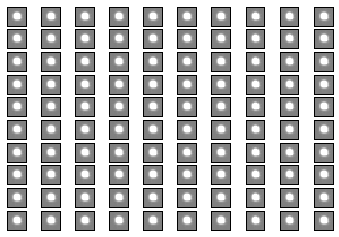

In [132]:
psf.plot_grid(range(10),range(10))

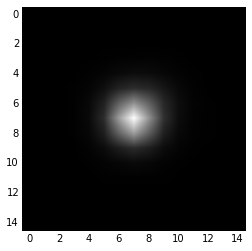

In [7]:
plt.imshow(psf.at(120,1024),cmap=plt.get_cmap('gray'))

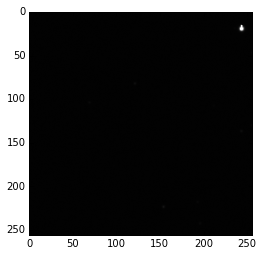

In [145]:
a=fits.open('PTF_201101245111_i_p_scie_t121602_u009806956_f02_p002845_c10.fits')
plt.imshow(a[0].data[0:256,0:256],cmap=plt.get_cmap('gray'))